# 4. Frequency Domain

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

## 4.1. Fourier transform

**4.1.1. For each filter given below, compute its Fourier transform, and illustrate its magnitude response. Determine what
is its function (smoothing, edge enhancement or edge detection) based on the filter coefficients as well as its
frequency response. For each filter, determine whether it is separable? If yes, compute the FT separately and
explain the function of each 1D filter. If not, compute the FT directly. (Test on grayscale Barbara Image).**

$$a = \frac{1}{16}\begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}, \quad b = \begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1 \end{bmatrix}, \quad c = \begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}$$

In [2]:
src_path = './Images/4/Barbara.bmp'
src = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)

In [3]:
filter_a = np.array(
    [[1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]]) * (1 / 16)

filter_b = np.array(
    [[-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]])

filter_c = np.array(
    [[0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]])

In [4]:
src_filter_a = cv2.filter2D(src, -1, filter_a)
src_filter_b = cv2.filter2D(src, -1, filter_b)
src_filter_c = cv2.filter2D(src, -1, filter_c)

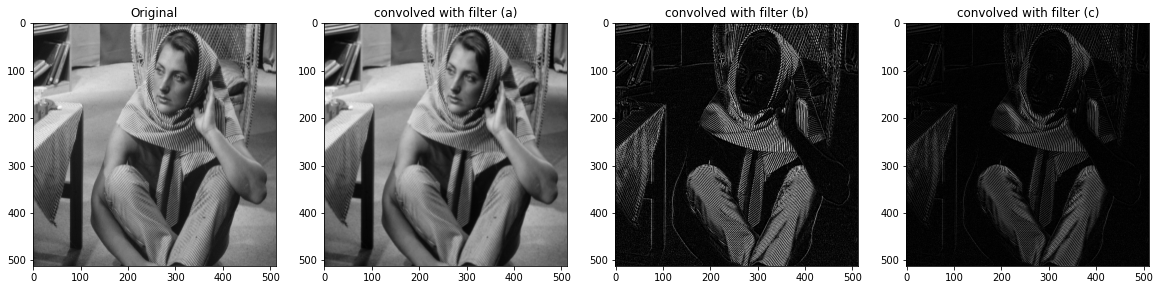

In [5]:
plt.figure(figsize=(20,10))

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(src, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("convolved with filter (a)")
plt.imshow(src_filter_a, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("convolved with filter (b)")
plt.imshow(src_filter_b, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("convolved with filter (c)")
plt.imshow(src_filter_c, cmap='gray')

plt.show()

In [6]:
def magnitude_spectrum(src):
    f = np.fft.fft2(src)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return magnitude_spectrum

In [7]:
src_mag_spec = magnitude_spectrum(src)

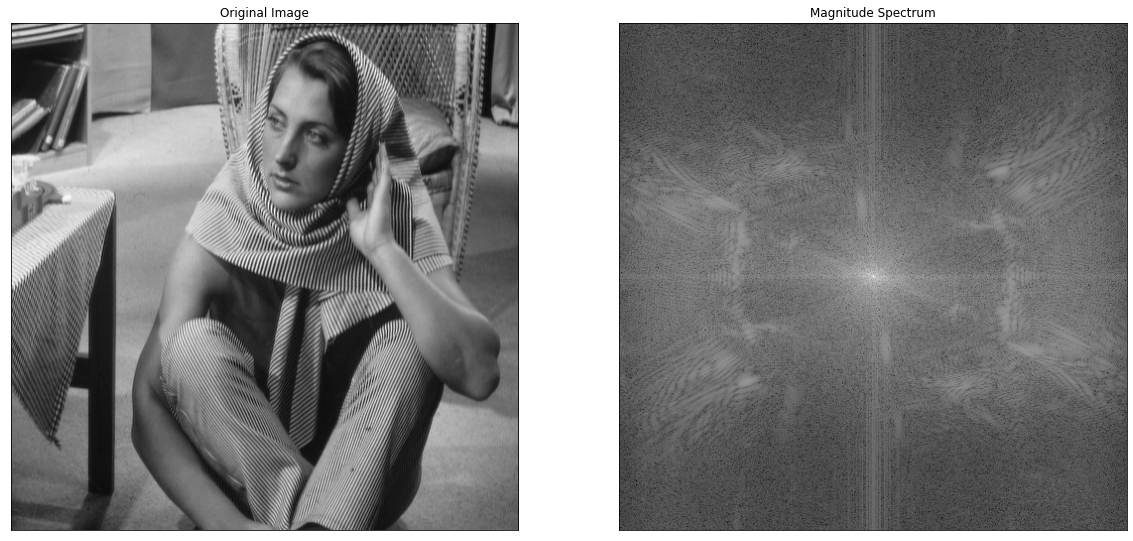

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(src, cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(src_mag_spec, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

plt.show()

### Filter (a)

In [9]:
filter_a_mag_spec = magnitude_spectrum(filter_a)

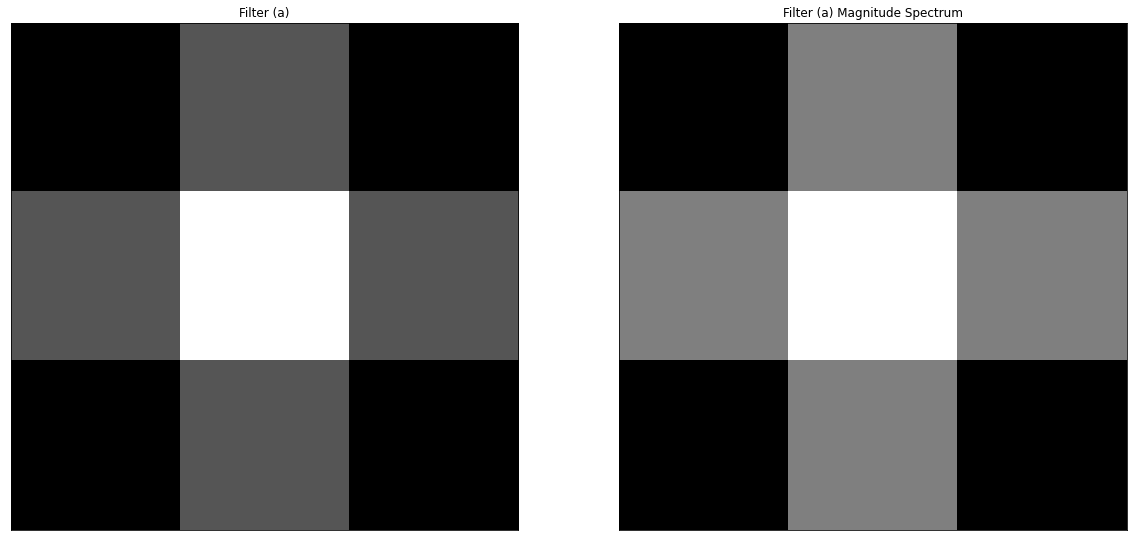

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(filter_a, cmap = 'gray')
plt.title('Filter (a)')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(filter_a_mag_spec, cmap = 'gray')
plt.title('Filter (a) Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

plt.show()

In [11]:
print('Filter (a) coefficients= ')
print(filter_a)
print()
print('Filter (a) magnitude spectrum coefficients= ')
print(filter_a_mag_spec)
print()
print('The difference= ')
print(filter_a - filter_a_mag_spec)

Filter (a) coefficients= 
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]

Filter (a) magnitude spectrum coefficients= 
[[-55.45177444 -27.72588722 -55.45177444]
 [-27.72588722   0.         -27.72588722]
 [-55.45177444 -27.72588722 -55.45177444]]

The difference= 
[[55.51427444 27.85088722 55.51427444]
 [27.85088722  0.25       27.85088722]
 [55.51427444 27.85088722 55.51427444]]


Filter (a) is separable:
$$\frac{1}{16}\begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix} = \frac{1}{16} \left[\begin{array}{l}
1 \\
2 \\
1
\end{array}\right] \otimes \begin{bmatrix} 1 & 2 & 1 \end{bmatrix}$$

In [12]:
print('np.fft.fft([1, 2, 1]) = \n' + str(np.fft.fft([1, 2, 1])))
print()
print('np.outer(np.fft.fft([1, 2, 1]), np.fft.fft([1, 2, 1])) = \n')
print(np.outer(np.fft.fft([1, 2, 1]), np.fft.fft([1, 2, 1])))
print()
print('np.fft.fft2([[1, 2, 1],[2, 4, 2],[1, 2, 1]])= \n')
print(np.fft.fft2(
    [[1, 2, 1],
     [2, 4, 2],
     [1, 2, 1]])
)

np.fft.fft([1, 2, 1]) = 
[ 4. +0.j        -0.5-0.8660254j -0.5+0.8660254j]

np.outer(np.fft.fft([1, 2, 1]), np.fft.fft([1, 2, 1])) = 

[[16. +0.j         -2. -3.46410162j -2. +3.46410162j]
 [-2. -3.46410162j -0.5+0.8660254j   1. +0.j        ]
 [-2. +3.46410162j  1. +0.j         -0.5-0.8660254j ]]

np.fft.fft2([[1, 2, 1],[2, 4, 2],[1, 2, 1]])= 

[[16. +0.00000000e+00j -2. -3.46410162e+00j -2. +3.46410162e+00j]
 [-2. -3.46410162e+00j -0.5+8.66025404e-01j  1. -1.11022302e-16j]
 [-2. +3.46410162e+00j  1. +1.11022302e-16j -0.5-8.66025404e-01j]]


Therefore, we'll have:
$$ \frac{1}{16}FT(\begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}) = \frac{1}{16} FT(\left[\begin{array}{l}
1 \\
2 \\
1
\end{array}\right]) \otimes FT(\begin{bmatrix} 1 & 2 & 1 \end{bmatrix})$$

### Filter (b)

In [13]:
filter_b_mag_spec = magnitude_spectrum(filter_b)

<ipython-input-6-72284b813fd7>:4: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))


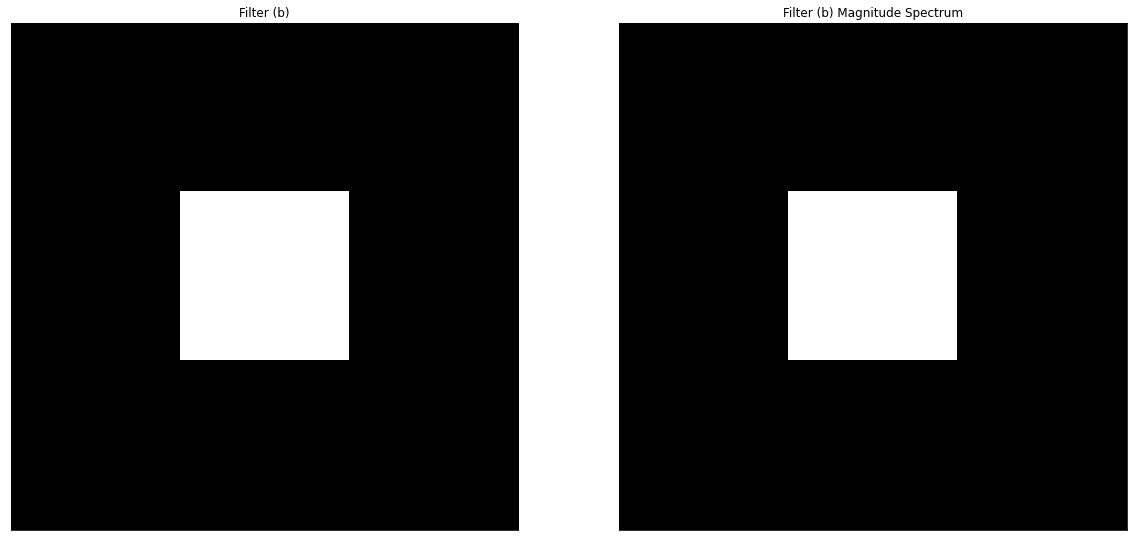

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(filter_b, cmap = 'gray')
plt.title('Filter (b)')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(filter_b_mag_spec, cmap = 'gray')
plt.title('Filter (b) Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

plt.show()

In [15]:
print('Filter (b) coefficients= ')
print(filter_b)
print()
print('Filter (b) magnitude spectrum coefficients= ')
print(filter_b_mag_spec)
print()
print('The difference= ')
print(filter_b - filter_b_mag_spec)

Filter (b) coefficients= 
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]

Filter (b) magnitude spectrum coefficients= 
[[43.94449155 43.94449155 43.94449155]
 [43.94449155        -inf 43.94449155]
 [43.94449155 43.94449155 43.94449155]]

The difference= 
[[-44.94449155 -44.94449155 -44.94449155]
 [-44.94449155          inf -44.94449155]
 [-44.94449155 -44.94449155 -44.94449155]]


In [16]:
print('np.fft.fft2([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])= \n')
print(np.fft.fft2(filter_b))

np.fft.fft2([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])= 

[[ 0. +0.j         -4.5-7.79422863j -4.5+7.79422863j]
 [-4.5-7.79422863j -4.5+7.79422863j  9. +0.j        ]
 [-4.5+7.79422863j  9. +0.j         -4.5-7.79422863j]]


### Filter (c)

In [17]:
filter_c_mag_spec = magnitude_spectrum(filter_c)

<ipython-input-6-72284b813fd7>:4: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))


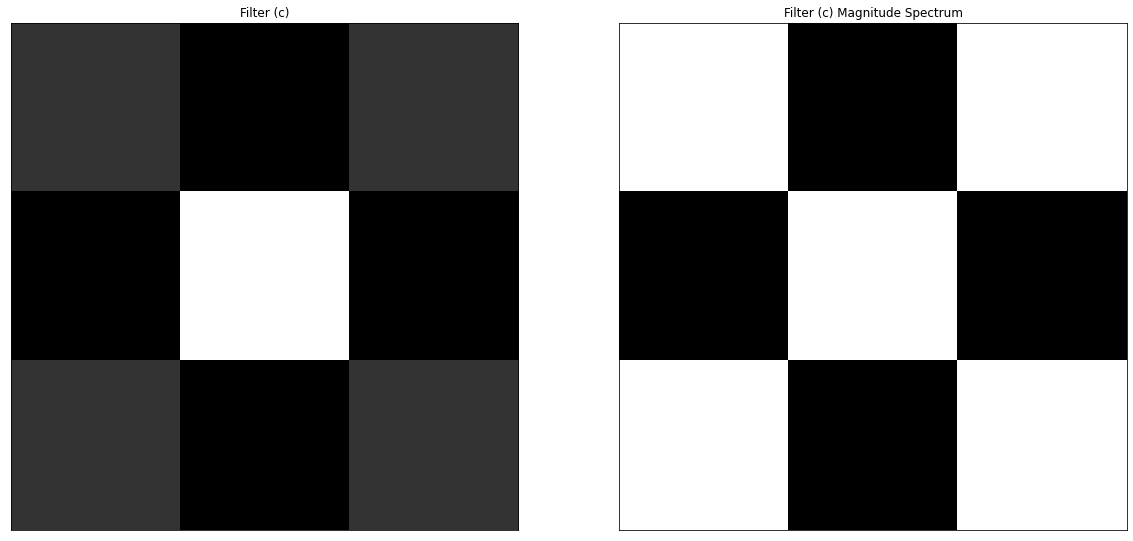

In [18]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(filter_c, cmap = 'gray')
plt.title('Filter (c)')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(filter_c_mag_spec, cmap = 'gray')
plt.title('Filter (c) Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

plt.show()

In [19]:
print('Filter (c) coefficients= ')
print(filter_c)
print()
print('Filter (c) magnitude spectrum coefficients= ')
print(filter_c_mag_spec)
print()
print('The difference= ')
print(filter_c - filter_c_mag_spec)

Filter (c) coefficients= 
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]

Filter (c) magnitude spectrum coefficients= 
[[35.83518938 21.97224577 35.83518938]
 [21.97224577        -inf 21.97224577]
 [35.83518938 21.97224577 35.83518938]]

The difference= 
[[-35.83518938 -22.97224577 -35.83518938]
 [-22.97224577          inf -22.97224577]
 [-35.83518938 -22.97224577 -35.83518938]]


In [20]:
print('np.fft.fft2([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])= \n')
print(np.fft.fft2(filter_c))

np.fft.fft2([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])= 

[[ 0. +0.j         -1.5-2.59807621j -1.5+2.59807621j]
 [-1.5-2.59807621j -3. +5.19615242j  6. +0.j        ]
 [-1.5+2.59807621j  6. +0.j         -3. -5.19615242j]]


**4.1.2. Perform 2D DFT on grayscale Lena, F16, and Baboon images. Display the magnitude of the DFT image with and
without shifting and with and without logarithmic. Display and discuss the results. Also, examine in which
frequency range the DFT coefficients have large magnitudes and explain why?**

**Barbara**

In [21]:
barbara_path = './Images/4/Barbara.bmp'
barbara = cv2.imread(barbara_path, cv2.IMREAD_GRAYSCALE)

baboon_path = './Images/4/Baboon.bmp'
baboon = cv2.imread(baboon_path, cv2.IMREAD_GRAYSCALE)

f16_path = './Images/4/F16.bmp'
f16 = cv2.imread(f16_path, cv2.IMREAD_GRAYSCALE)

lena_path = './Images/4/Lena.bmp'
lena = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)

In [22]:
def get_magnitude_spectrum(src):
    f = np.fft.fft2(src)
    fshift = np.fft.fftshift(f)
    f_magnitude_spectrum = 20 * np.log(np.abs(f) + 1)
    fshift_magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return (np.abs(f), np.abs(fshift), f_magnitude_spectrum, fshift_magnitude_spectrum)

In [23]:
barbara_mag_spec, barbara_shift_mag_spec, barbara_log_mag_spec, barbara_log_shift_mag_spec = get_magnitude_spectrum(barbara)

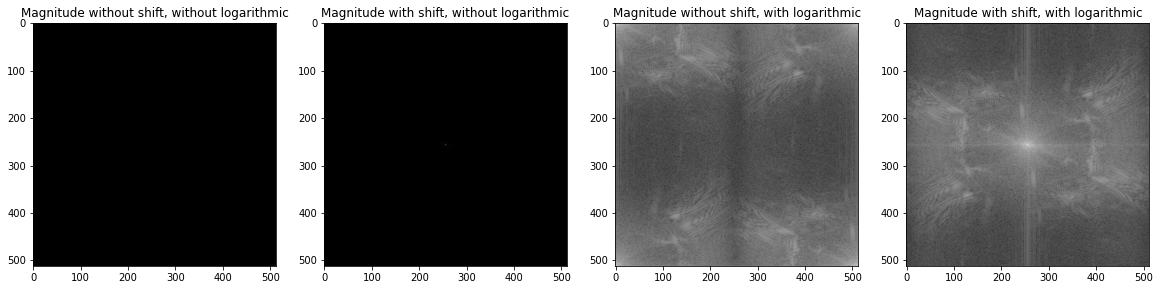

In [24]:
plt.figure(figsize=(20,10))

plt.subplot(1, 4, 1)
plt.title("Magnitude without shift, without logarithmic")
plt.imshow(barbara_mag_spec, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Magnitude with shift, without logarithmic")
plt.imshow(barbara_shift_mag_spec, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Magnitude without shift, with logarithmic")
plt.imshow(barbara_log_mag_spec, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Magnitude with shift, with logarithmic")
plt.imshow(barbara_log_shift_mag_spec, cmap='gray')

plt.show()

In [25]:
fft_barbara = np.fft.fft2(barbara)
freqs = np.fft.fftfreq(fft_barbara.shape[0])

In [26]:
def get_freq_map(fft_data, freqs):
    freq_map = {}
    for coefs, freq in zip(fft_data, freqs):
        coef_list = []
        for coef in coefs:
            if coef:
                coef_list.append(coef)
        freq_map[freq] = coef_list

    return freq_map

In [27]:
barbara_freq_map = get_freq_map(fft_barbara, freqs)

In [28]:
baboon_mag_spec, baboon_shift_mag_spec, baboon_log_mag_spec, baboon_log_shift_mag_spec = get_magnitude_spectrum(baboon)

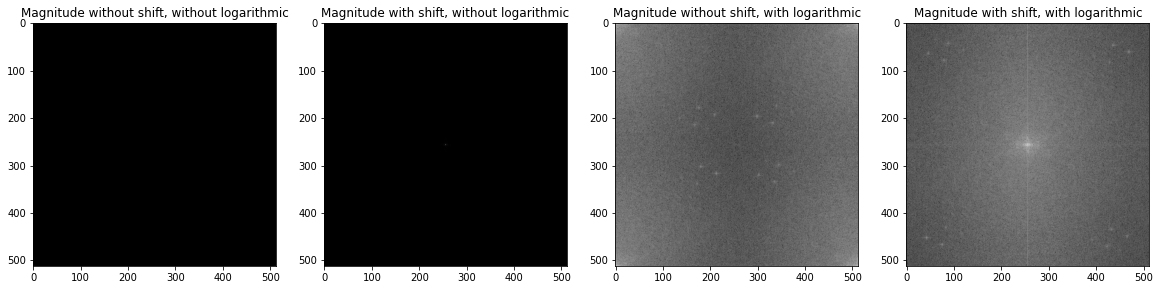

In [29]:
plt.figure(figsize=(20,10))

plt.subplot(1, 4, 1)
plt.title("Magnitude without shift, without logarithmic")
plt.imshow(baboon_mag_spec, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Magnitude with shift, without logarithmic")
plt.imshow(baboon_shift_mag_spec, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Magnitude without shift, with logarithmic")
plt.imshow(baboon_log_mag_spec, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Magnitude with shift, with logarithmic")
plt.imshow(baboon_log_shift_mag_spec, cmap='gray')

plt.show()

In [30]:
fft_baboon = np.fft.fft2(baboon)
freqs = np.fft.fftfreq(fft_baboon.shape[0])

In [31]:
baboon_freq_map = get_freq_map(fft_baboon, freqs)

**F16**

In [32]:
f16_mag_spec, f16_shift_mag_spec, f16_log_mag_spec, f16_log_shift_mag_spec = get_magnitude_spectrum(f16)

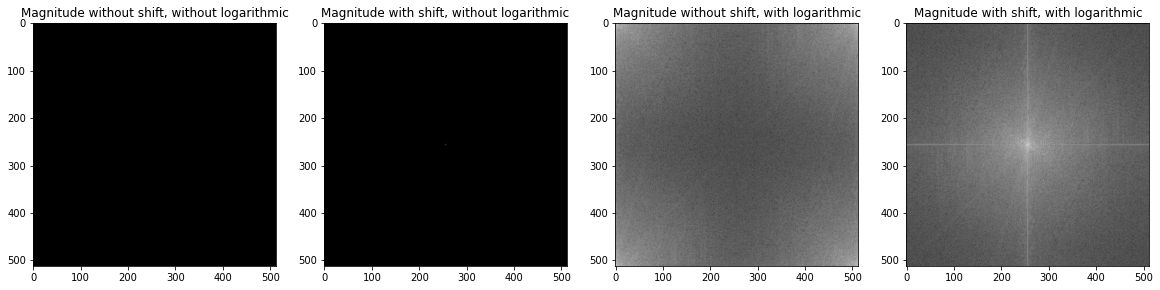

In [33]:
plt.figure(figsize=(20,10))

plt.subplot(1, 4, 1)
plt.title("Magnitude without shift, without logarithmic")
plt.imshow(f16_mag_spec, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Magnitude with shift, without logarithmic")
plt.imshow(f16_shift_mag_spec, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Magnitude without shift, with logarithmic")
plt.imshow(f16_log_mag_spec, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Magnitude with shift, with logarithmic")
plt.imshow(f16_log_shift_mag_spec, cmap='gray')

plt.show()

In [34]:
fft_f16 = np.fft.fft2(f16)
freqs = np.fft.fftfreq(fft_f16.shape[0])

In [35]:
f16_freq_map = get_freq_map(fft_f16, freqs)

**Lena**

In [36]:
lena_mag_spec, lena_shift_mag_spec, lena_log_mag_spec, lena_log_shift_mag_spec = get_magnitude_spectrum(lena)

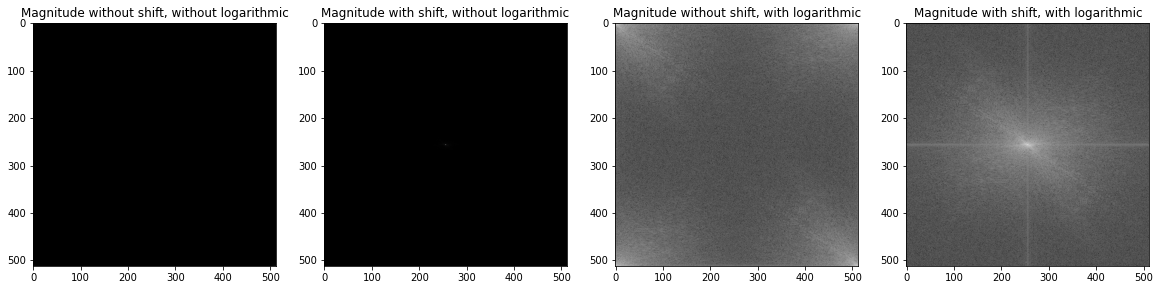

In [37]:
plt.figure(figsize=(20,10))

plt.subplot(1, 4, 1)
plt.title("Magnitude without shift, without logarithmic")
plt.imshow(lena_mag_spec, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Magnitude with shift, without logarithmic")
plt.imshow(lena_shift_mag_spec, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Magnitude without shift, with logarithmic")
plt.imshow(lena_log_mag_spec, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Magnitude with shift, with logarithmic")
plt.imshow(lena_log_shift_mag_spec, cmap='gray')

plt.show()

In [38]:
fft_lena = np.fft.fft2(lena)
freqs = np.fft.fftfreq(fft_lena.shape[0])

In [39]:
lena_freq_map = get_freq_map(fft_lena, freqs)

## 4.2. Filtering

**4.2.2. Write a program that filters grayscale Lena image by zeroing out certain DFT coefficients.The program consists of three steps:**

**1. Performing 2D DFT.**

**2. Zeroing out the coefficients at certain frequencies (see below).**

**3. Performing inverse DFT to get back a filtered image.**

**Note: Truncate or scale the image properly such that its range is between 0 and 255.**

**For part 2, try the following two types of filters:**

* **a. Let 𝐹(𝑘, 𝑙) = 0 for 𝑇𝑁 < {𝑘, 𝑙} < (1 − 𝑇 )𝑁, 𝑇 = 1/4, 1/8 (low-pass filtering).**

* **b. Let 𝐹(𝑘, 𝑙) = 0 for the following regions:**

    * **i. 0 ≤ {𝑘 𝑎𝑛𝑑 𝑙} ≤ 𝑇𝑁;**

    * **ii. 0 <= 𝑘 <= 𝑇𝑁, 𝑎𝑛𝑑 (1 − 𝑇)𝑁 ≤ 𝑙 ≤ 𝑁 − 1;**

    * **ii. (1 − 𝑇)𝑁 ≤ 𝑘 ≤ 𝑁 − 1 𝑎𝑛𝑑 0 ≤ {𝑙} ≤ 𝑇𝑁;**

    * **iv. iv)(1 − 𝑇)𝑁 ≤ 𝑘 𝑎𝑛𝑑 𝑙 ≤ 𝑁 − 1; 𝑇 = 1/4, 1/8**

**Display and compare the original and processed images. Discuss the function of the two types of filters.
Note: you can use fft2, ifft2, fftshift, and rgb2gray functions.**

## Resources

1. https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html
2. https://opencv24-python-tutorials.readthedocs.io/en/stable/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
3. https://blogs.mathworks.com/steve/2006/10/04/separable-convolution/#:~:text=A%20two%2Ddimensional%20filter%20kernel,outer%20product%20of%20two%20vectors.
4. https://www.dspguide.com/ch24/3.htm
5. https://numpy.org/doc/stable/reference/generated/numpy.outer.html
6. https://stackoverflow.com/questions/14582543/extracting-frequencies-from-multidimensional-fft
7. https://stackoverflow.com/questions/3694918/how-to-extract-frequency-associated-with-fft-values-in-python